In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## Data Collection

In [4]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-24,28.293386,28.594877,28.264353,28.413984,131369200
2015-03-25,27.554165,28.322413,27.554165,28.259881,206620800
2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600
2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800
2015-03-30,28.221920,28.228620,27.692633,27.703800,188398800
...,...,...,...,...,...
2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400
2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400


## Data visualization & Exploration

In [5]:
df.shape

(2515, 5)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe() #statistical overview

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,98.626077,99.595398,97.550649,98.538049,1.130154e+08
std,67.887655,68.529328,67.154822,67.817094,6.550750e+07
min,20.674534,20.978913,20.475433,20.596730,2.323470e+07
25%,36.576841,36.946674,36.314583,36.669200,6.914900e+07
50%,72.956573,73.706271,71.943751,72.915315,9.701680e+07
75%,156.368042,158.452176,154.029597,156.669991,1.375348e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df = df.reset_index()
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-24,28.293386,28.594877,28.264353,28.413984,131369200
1,2015-03-25,27.554165,28.322413,27.554165,28.259881,206620800
2,2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600
3,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800
4,2015-03-30,28.221920,28.228620,27.692633,27.703800,188398800
...,...,...,...,...,...,...
2510,2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400
2511,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400
2512,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400


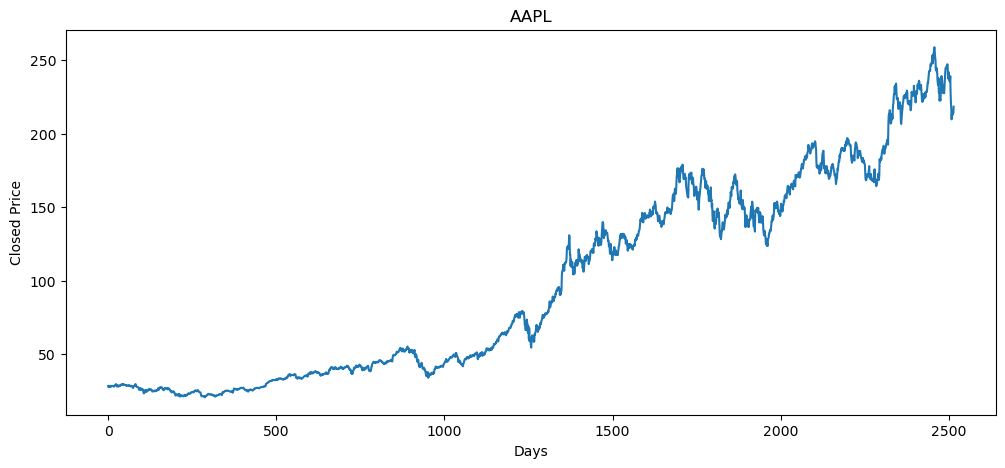

In [11]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Closed Price');

## Feature Engineering

### 100 days moving average

In [12]:
df['MA_100'] = df.Close.rolling(100).mean()

In [13]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-24,28.293386,28.594877,28.264353,28.413984,131369200,NaN
1,2015-03-25,27.554165,28.322413,27.554165,28.259881,206620800,NaN
2,2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600,NaN
3,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN
4,2015-03-30,28.221920,28.228620,27.692633,27.703800,188398800,NaN
...,...,...,...,...,...,...,...
98,2015-08-12,25.960768,26.001317,24.696971,25.350271,404870000,NaN
99,2015-08-13,25.940487,26.222081,25.803069,26.140982,194143200,28.246432
100,2015-08-14,26.122963,26.201809,25.683676,25.753511,171718000,28.224728


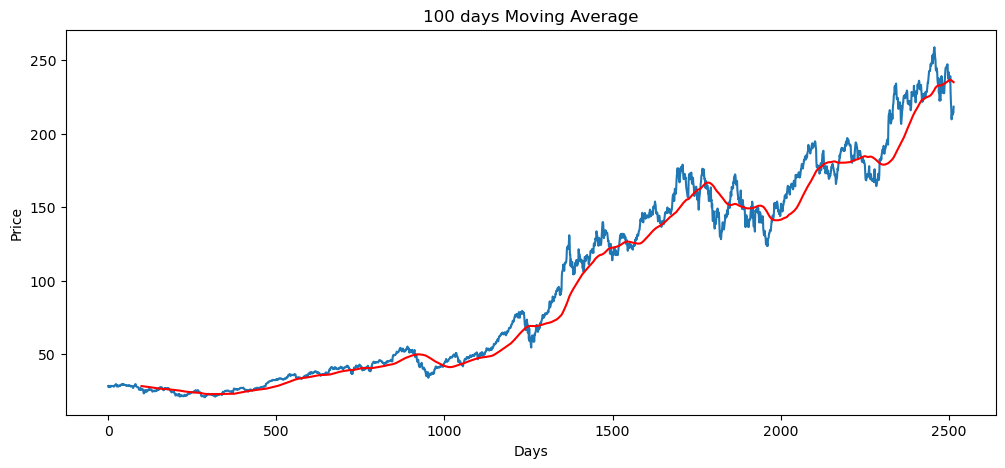

In [14]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r');
plt.title('100 days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

In [15]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-24,28.293386,28.594877,28.264353,28.413984,131369200,NaN,NaN
1,2015-03-25,27.554165,28.322413,27.554165,28.259881,206620800,NaN,NaN
2,2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600,NaN,NaN
3,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN,NaN
4,2015-03-30,28.221920,28.228620,27.692633,27.703800,188398800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-01-05,23.237097,23.947490,23.169226,23.924866,223164000,25.604023,NaN
199,2016-01-06,22.782354,23.160176,22.594577,22.750681,273829600,25.572442,26.909437
200,2016-01-07,21.820831,22.653394,21.816307,22.325347,324377600,25.529420,26.877074


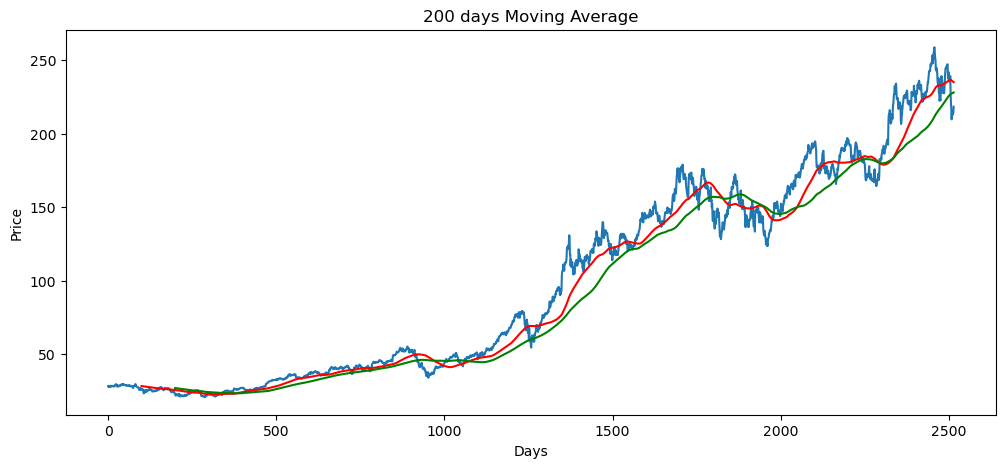

In [16]:
plt.figure(figsize=(12,5));
plt.plot(df.Close);
plt.plot(df['MA_100'], 'r');
plt.plot(df['MA_200'], 'g');
plt.title('200 days Moving Average');
plt.xlabel('Days');
plt.ylabel('Price');

### calculating % changed in each trading session

In [17]:
df['percentage changed'] = df.Close.pct_change()
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,percentage changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-03-24,28.293386,28.594877,28.264353,28.413984,131369200,NaN,NaN,NaN
1,2015-03-25,27.554165,28.322413,27.554165,28.259881,206620800,NaN,NaN,-0.026127
2,2015-03-26,27.746233,27.889163,27.379976,27.415709,190291600,NaN,NaN,0.006971
3,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN,NaN,-0.007969
4,2015-03-30,28.221920,28.228620,27.692633,27.703800,188398800,NaN,NaN,0.025314
...,...,...,...,...,...,...,...,...,...
2510,2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400,235.672317,227.473336,0.002389
2511,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400,235.439610,227.588523,-0.006121
2512,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,235.238590,227.711477,0.011989


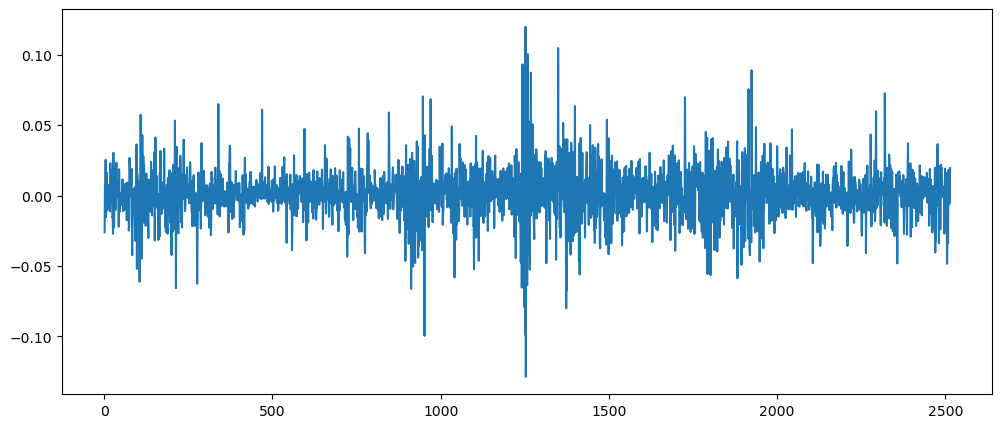

In [18]:
plt.figure(figsize=(12,5));
plt.plot(df['percentage changed']);

### Data Preprocessing

In [20]:
df.shape

(2515, 9)

In [28]:
#splitting data into training & testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.293386
1        27.554165
2        27.746233
3        27.525137
4        28.221920
...            ...
1755    152.262802
1756    148.218353
1757    152.617065
1758    157.045319
1759    158.058899

[1760 rows x 1 columns]
Ticker        AAPL
1760    161.365311
1761    162.743011
1762    166.128113
1763    167.495987
1764    171.294418
...            ...
2510    214.000000
2511    212.690002
2512    215.240005
2513    214.100006
2514    218.270004

[755 rows x 1 columns]


In [ ]:
#scalling down the dat between zero and one

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04815799],
       [0.04348545],
       [0.04469949],
       ...,
       [0.83399531],
       [0.86198585],
       [0.86839258]], shape=(1760, 1))

### Sequence Creation

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train

array([[[0.04815799],
        [0.04348545],
        [0.04469949],
        ...,
        [0.03092182],
        [0.03341375],
        [0.03328555]],

       [[0.04348545],
        [0.04469949],
        [0.04330196],
        ...,
        [0.03341375],
        [0.03328555],
        [0.03443897]],

       [[0.04469949],
        [0.04330196],
        [0.04770626],
        ...,
        [0.03328555],
        [0.03443897],
        [0.03614772]],

       ...,

       [[0.79519947],
        [0.79656403],
        [0.79166354],
        ...,
        [0.85533037],
        [0.83175605],
        [0.8061915 ]],

       [[0.79656403],
        [0.79166354],
        [0.79135355],
        ...,
        [0.83175605],
        [0.8061915 ],
        [0.83399531]],

       [[0.79166354],
        [0.79135355],
        [0.79557176],
        ...,
        [0.8061915 ],
        [0.83399531],
        [0.86198585]]], shape=(1660, 100, 1))

In [35]:
x_train.shape

(1660, 100, 1)

In [37]:
y_train

array([0.03443897, 0.03614772, 0.03520785, ..., 0.83399531, 0.86198585,
       0.86839258], shape=(1660,))

In [38]:
y_train.shape

(1660,)

### Model Building

In [41]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [44]:
#ML model
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM

In [45]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### Model Training

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - loss: 0.0216
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 4.1015e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 4.4871e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 4.8448e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 4.2154e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 3.9987e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 4.0404e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 2.9206e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 3.1180e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 3.3033e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 3.4330e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 3.1998e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 3.0484e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 3.8554e-04
Epoc

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [48]:
model.save('stock_prediction_model.keras')

### Preparing Test Data

In [49]:
data_testing

Ticker,AAPL
1760,161.365311
1761,162.743011
1762,166.128113
1763,167.495987
1764,171.294418
...,...
2510,214.000000
2511,212.690002
2512,215.240005
2513,214.100006


In [52]:
past_100_days = data_training.tail(100)

In [53]:
past_100_days

Ticker,AAPL
1660,145.870911
1661,146.538254
1662,146.077011
1663,149.727692
1664,147.009277
...,...
1755,152.262802
1756,148.218353
1757,152.617065
1758,157.045319


In [54]:
finaldf = pd.concat([past_100_days, data_testing], ignore_index=True)
finaldf

Ticker,AAPL
0,145.870911
1,146.538254
2,146.077011
3,149.727692
4,147.009277
...,...
850,214.000000
851,212.690002
852,215.240005
853,214.100006


In [55]:
input_data = scaler.fit_transform(finaldf)
input_data

array([[1.64908729e-01],
       [1.69846437e-01],
       [1.66433677e-01],
       [1.93445261e-01],
       [1.73331566e-01],
       [1.67232223e-01],
       [1.74929110e-01],
       [1.85603298e-01],
       [1.81754742e-01],
       [1.85681425e-01],
       [1.79573276e-01],
       [1.82263698e-01],
       [1.61248152e-01],
       [1.60884500e-01],
       [1.76300739e-01],
       [1.76373447e-01],
       [1.83645488e-01],
       [2.01752263e-01],
       [2.33602541e-01],
       [2.53091219e-01],
       [2.56509172e-01],
       [2.59344784e-01],
       [2.63198872e-01],
       [2.25894478e-01],
       [2.50836819e-01],
       [2.87632370e-01],
       [2.83778169e-01],
       [2.76433646e-01],
       [2.62471566e-01],
       [2.87777561e-01],
       [3.30390428e-01],
       [3.58750497e-01],
       [3.54969117e-01],
       [3.90528406e-01],
       [3.63550128e-01],
       [3.53296495e-01],
       [3.89437448e-01],
       [3.38244021e-01],
       [3.30099596e-01],
       [3.19991831e-01],


In [56]:
input_data.shape

(855, 1)

In [57]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [58]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [59]:
x_test

array([[[0.16490873],
        [0.16984644],
        [0.16643368],
        ...,
        [0.2148239 ],
        [0.24758878],
        [0.25508832]],

       [[0.16984644],
        [0.16643368],
        [0.19344526],
        ...,
        [0.24758878],
        [0.25508832],
        [0.27955264]],

       [[0.16643368],
        [0.19344526],
        [0.17333157],
        ...,
        [0.25508832],
        [0.27955264],
        [0.28974632]],

       ...,

       [[0.82691049],
        [0.78925814],
        [0.78785557],
        ...,
        [0.66522609],
        [0.66899957],
        [0.65930683]],

       [[0.78925814],
        [0.78785557],
        [0.79405698],
        ...,
        [0.66899957],
        [0.65930683],
        [0.67817444]],

       [[0.78785557],
        [0.79405698],
        [0.80874874],
        ...,
        [0.65930683],
        [0.67817444],
        [0.66973952]]], shape=(755, 100, 1))

In [60]:
y_test

array([2.79552638e-01, 2.89746321e-01, 3.14792870e-01, 3.24913846e-01,
       3.53018646e-01, 3.57751440e-01, 3.64158662e-01, 3.88623096e-01,
       3.79958877e-01, 3.56950523e-01, 3.54766235e-01, 3.84836861e-01,
       3.60227124e-01, 3.36709137e-01, 3.38966246e-01, 3.24039882e-01,
       2.92440130e-01, 3.06347001e-01, 3.26297104e-01, 2.89090482e-01,
       2.87489212e-01, 3.04453884e-01, 3.03216155e-01, 2.97318565e-01,
       2.63607007e-01, 2.71543469e-01, 2.27274575e-01, 2.25600033e-01,
       2.77077066e-01, 2.33463560e-01, 2.35720557e-01, 2.46787752e-01,
       2.94406181e-01, 2.27056112e-01, 2.32451971e-01, 1.94388998e-01,
       2.12253713e-01, 1.53846614e-01, 1.25117021e-01, 1.58294560e-01,
       1.46846663e-01, 1.73826071e-01, 1.12429477e-01, 8.71269820e-02,
       8.88768286e-02, 1.29127590e-01, 1.09075087e-01, 1.10242027e-01,
       1.34012799e-01, 1.76743084e-01, 1.70909396e-01, 1.69961483e-01,
       1.88190867e-01, 1.45679836e-01, 1.51221449e-01, 1.69961483e-01,
      

### Making Prediction

In [61]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step  


In [62]:
y_predicted

array([[0.246646  ],
       [0.26831302],
       [0.28404713],
       [0.3040534 ],
       [0.3187362 ],
       [0.34068334],
       [0.35318124],
       [0.36078912],
       [0.3785729 ],
       [0.38097262],
       [0.3657601 ],
       [0.35732827],
       [0.37431782],
       [0.36807466],
       [0.3488875 ],
       [0.34173298],
       [0.33098203],
       [0.30746073],
       [0.30482614],
       [0.3177368 ],
       [0.3027836 ],
       [0.29221636],
       [0.29762173],
       [0.30093336],
       [0.29853877],
       [0.2772406 ],
       [0.27030337],
       [0.24447869],
       [0.23012556],
       [0.2529559 ],
       [0.24532625],
       [0.23921166],
       [0.24230953],
       [0.27120116],
       [0.2508762 ],
       [0.23801786],
       [0.2127102 ],
       [0.20856221],
       [0.18020675],
       [0.14964062],
       [0.14913985],
       [0.1484024 ],
       [0.16106038],
       [0.14130218],
       [0.11410691],
       [0.0984122 ],
       [0.10879249],
       [0.111

In [63]:
y_test

array([2.79552638e-01, 2.89746321e-01, 3.14792870e-01, 3.24913846e-01,
       3.53018646e-01, 3.57751440e-01, 3.64158662e-01, 3.88623096e-01,
       3.79958877e-01, 3.56950523e-01, 3.54766235e-01, 3.84836861e-01,
       3.60227124e-01, 3.36709137e-01, 3.38966246e-01, 3.24039882e-01,
       2.92440130e-01, 3.06347001e-01, 3.26297104e-01, 2.89090482e-01,
       2.87489212e-01, 3.04453884e-01, 3.03216155e-01, 2.97318565e-01,
       2.63607007e-01, 2.71543469e-01, 2.27274575e-01, 2.25600033e-01,
       2.77077066e-01, 2.33463560e-01, 2.35720557e-01, 2.46787752e-01,
       2.94406181e-01, 2.27056112e-01, 2.32451971e-01, 1.94388998e-01,
       2.12253713e-01, 1.53846614e-01, 1.25117021e-01, 1.58294560e-01,
       1.46846663e-01, 1.73826071e-01, 1.12429477e-01, 8.71269820e-02,
       8.88768286e-02, 1.29127590e-01, 1.09075087e-01, 1.10242027e-01,
       1.34012799e-01, 1.76743084e-01, 1.70909396e-01, 1.69961483e-01,
       1.88190867e-01, 1.45679836e-01, 1.51221449e-01, 1.69961483e-01,
      

In [64]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [65]:
y_predicted

array([156.91791 , 159.84625 , 161.97275 , 164.67665 , 166.66106 ,
       169.62727 , 171.31639 , 172.34462 , 174.74814 , 175.07246 ,
       173.01645 , 171.87688 , 174.17307 , 173.32927 , 170.7361  ,
       169.76913 , 168.31612 , 165.13716 , 164.78108 , 166.526   ,
       164.50504 , 163.07684 , 163.80739 , 164.25496 , 163.93134 ,
       161.05284 , 160.11525 , 156.62498 , 154.68512 , 157.7707  ,
       156.73953 , 155.91313 , 156.33182 , 160.23659 , 157.48962 ,
       155.75179 , 152.3314  , 151.77078 , 147.93848 , 143.8074  ,
       143.73972 , 143.64005 , 145.35078 , 142.68044 , 139.00491 ,
       136.88374 , 138.28667 , 138.59012 , 138.65074 , 140.05171 ,
       143.74768 , 145.87411 , 146.63472 , 147.94846 , 145.89966 ,
       144.65562 , 145.3472  , 145.72154 , 143.42041 , 139.33763 ,
       134.64612 , 132.25616 , 132.31718 , 130.73378 , 130.04018 ,
       131.45522 , 132.56358 , 134.33391 , 136.92674 , 138.59239 ,
       137.49583 , 137.07063 , 135.87778 , 135.99481 , 137.462

In [66]:
y_test

array([161.36531067, 162.74301147, 166.12811279, 167.49598694,
       171.29441833, 171.93406677, 172.80001831, 176.10644531,
       174.93545532, 171.82582092, 171.53060913, 175.59472656,
       172.2686615 , 169.09014893, 169.39520264, 167.37786865,
       163.10708618, 164.9866333 , 167.68293762, 162.65437317,
       162.43795776, 164.73077393, 164.56349182, 163.76641846,
       159.21022034, 160.28285217, 154.29980469, 154.07348633,
       161.0307312 , 155.13626099, 155.44129944, 156.9370575 ,
       163.37280273, 154.27027893, 154.99954224, 149.85523987,
       152.2696991 , 144.37583923, 140.4929657 , 144.97698975,
       143.42977905, 147.07611084, 138.7782135 , 135.35852051,
       135.59501648, 141.03500366, 138.32485962, 138.48257446,
       141.69525146, 147.47035217, 146.68191528, 146.55380249,
       149.01754761, 143.27207947, 144.02104187, 146.55380249,
       145.81471252, 140.57180786, 135.14170837, 129.96780396,
       130.83508301, 133.46636963, 128.17422485, 129.65

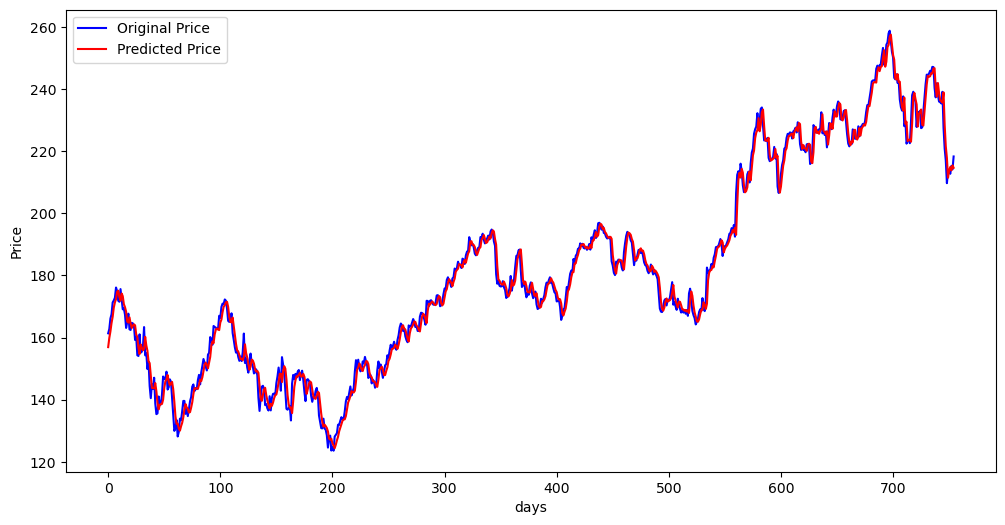

In [68]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('days');
plt.ylabel('Price');
plt.legend();

(160.0, 220.0)

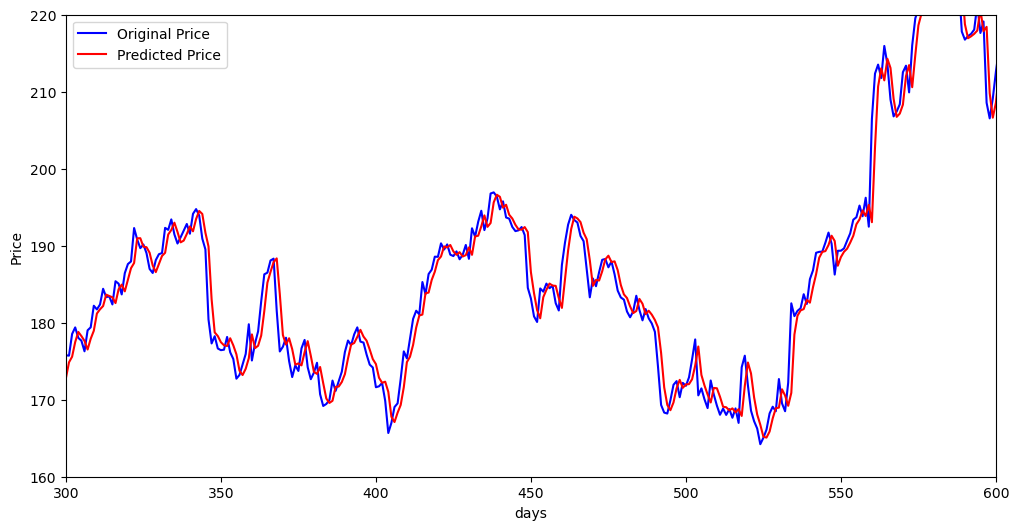

In [69]:
plt.figure(figsize=(12,6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('days');
plt.ylabel('Price');
plt.legend();
plt.xlim(300, 600)
plt.ylim(160, 220)

### Model Evaluation

In [70]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error:{mse}")

Mean Squared Error:9.911068306877105


In [73]:
#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

Root Mean Squared Error:3.1481849225985923


In [74]:
#R-Squared
r2 = r2_score(y_test, y_predicted)
print(f'R-Squared: {r2}')

R-Squared: 0.990712407501883
